In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , accuracy_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\DEBABRATA\Desktop\Datasets\Advertising.csv")


In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [25]:
# SELECTING THE SECOND, THIRD AND FOURTH COLUMN

x= df.iloc[:, 1:4]

y=df.iloc[:,4]

In [26]:
seed_value=23
np.random.seed(seed_value)

In [96]:
# FITTING THE LINEAR REGRASSION MODEL

regressor= LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=45)
regressor.fit(x_train, y_train)

LinearRegression()

In [97]:
# INSPECTING THE MODEL
regressor.coef_

array([ 0.04666685,  0.18315272, -0.0063929 ])

In [98]:
# TO RETRIVE THE INTERCEPT

regressor.intercept_

3.080220568842412

In [99]:
# FOR RETRIVING THE SLOPE

regressor.coef_

array([ 0.04666685,  0.18315272, -0.0063929 ])

In [100]:
# CHECKING THE VALIDITY OF MODEL

x2= sm.add_constant(x_train)
est = sm.OLS(y_train, x2)
est2= est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     407.2
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           1.08e-70
Time:                        23:53:52   Log-Likelihood:                -295.11
No. Observations:                 150   AIC:                             598.2
Df Residuals:                     146   BIC:                             610.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0802      0.361      8.543      0.0

In [101]:
y_pred = regressor.predict(x_test)


In [102]:
r2_score(y_test,y_pred)

0.9035487616562967

In [103]:
# LOADING TESTING VALUE

dd1=x_test
dd2=y_test

In [104]:
# BOX PLOT


<AxesSubplot:xlabel='Newspaper'>

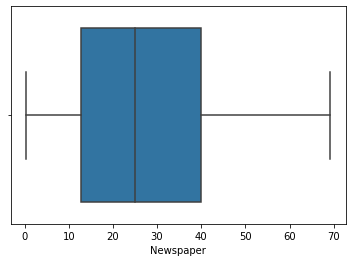

In [105]:
sns.boxplot(x=dd1['Newspaper'])

<AxesSubplot:xlabel='Radio'>

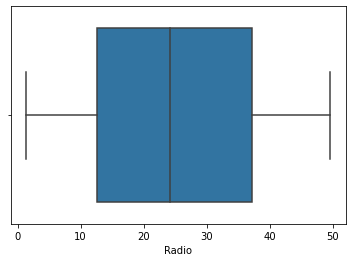

In [106]:
sns.boxplot(x=dd1['Radio'])

<AxesSubplot:xlabel='TV'>

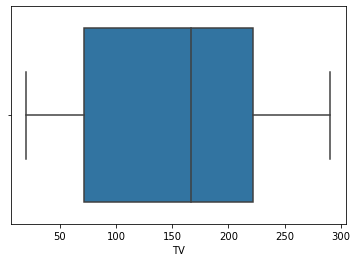

In [107]:
sns.boxplot(x=dd1['TV'])

<AxesSubplot:xlabel='Sales'>

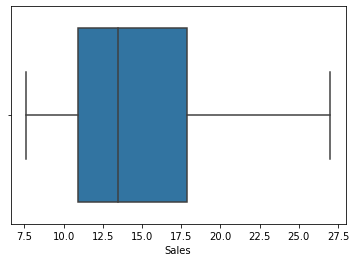

In [108]:
sns.boxplot(x=dd2)

{'whiskers': [<matplotlib.lines.Line2D at 0x24d669a7040>,
 'caps': [<matplotlib.lines.Line2D at 0x24d669a7700>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d668e4ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d669a7dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d669b44c0>],
 'means': [<matplotlib.lines.Line2D at 0x24d669b4160>]}

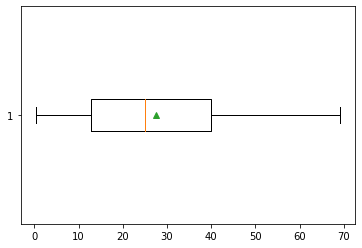

In [109]:
plt.boxplot(dd1['Newspaper'], showmeans=True, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x24d66a06400>,
 'caps': [<matplotlib.lines.Line2D at 0x24d66a06ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d66a060a0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d66a121c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d66a12880>],
 'means': [<matplotlib.lines.Line2D at 0x24d66a12520>]}

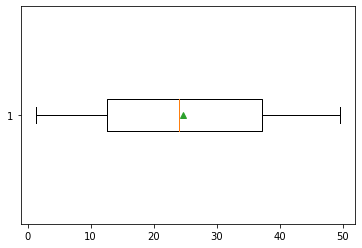

In [110]:
plt.boxplot(dd1['Radio'], showmeans=True, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x24d66a5dc70>,
 'caps': [<matplotlib.lines.Line2D at 0x24d66a69370>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d66a5d910>],
 'medians': [<matplotlib.lines.Line2D at 0x24d66a69a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d66a77130>],
 'means': [<matplotlib.lines.Line2D at 0x24d66a69d90>]}

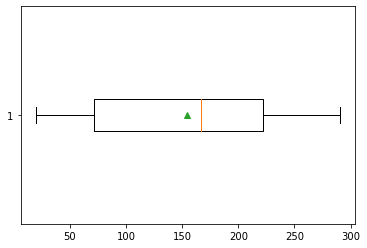

In [111]:
plt.boxplot(dd1['TV'], showmeans=True, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x24d66ac5460>,
 'caps': [<matplotlib.lines.Line2D at 0x24d66ac5b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d66ac5160>],
 'medians': [<matplotlib.lines.Line2D at 0x24d66acf220>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d66acf8e0>],
 'means': [<matplotlib.lines.Line2D at 0x24d66acf580>]}

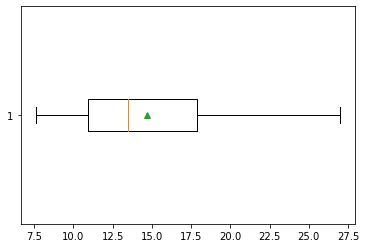

In [112]:
plt.boxplot(dd2, showmeans=True, vert=False)

In [113]:


corr_df=pd.DataFrame(columns=['r', 'p'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col!= 'Unnamed: 0' and col!='Sales':
        r, p = stats.pearsonr(df.Sales, df[col])
        corr_df.loc[col]= [round(r,3) , round(p, 3)]
    
corr_df

,r,p
TV,0.782,0.000
Radio,0.576,0.000
Newspaper,0.228,0.001


In [114]:
# DIFFERENT TEST VALUE BUT RANDOM VALUE SAME
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=79)

dd1=x_test
dd2=y_test

<AxesSubplot:xlabel='TV'>

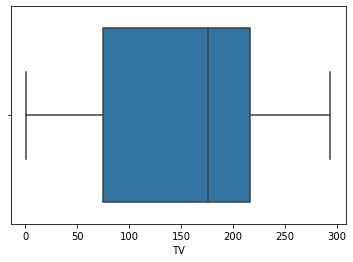

In [115]:
sns.boxplot(x=dd1['TV'])

<AxesSubplot:xlabel='Newspaper'>

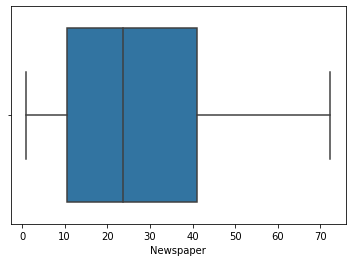

In [116]:
sns.boxplot(x=dd1['Newspaper'])

<AxesSubplot:xlabel='Radio'>

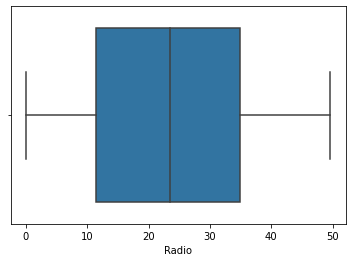

In [117]:
sns.boxplot(x=dd1['Radio'])

<AxesSubplot:xlabel='Sales'>

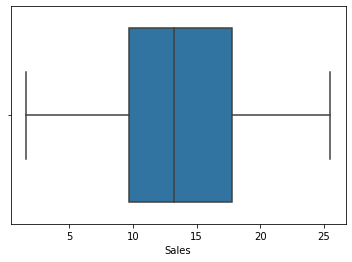

In [118]:
sns.boxplot(x=dd2)

In [119]:
y_pred = regressor.predict(x_test)
r2_score(y_test,y_pred)


0.8948781278301954

In [120]:
# DIFFERENT TEST VALUE BUT RANDOM VALUE SAME
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=79)

dd1=x_test
dd2=y_test

<AxesSubplot:xlabel='TV'>

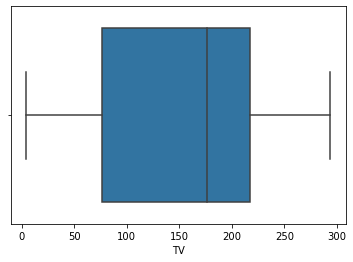

In [121]:
sns.boxplot(x=dd1['TV'])

<AxesSubplot:xlabel='Newspaper'>

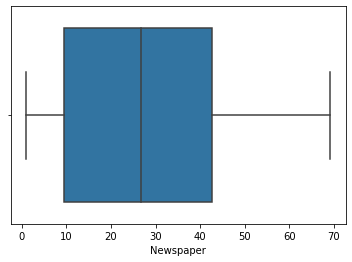

In [122]:
sns.boxplot(x=dd1['Newspaper'])

<AxesSubplot:xlabel='Radio'>

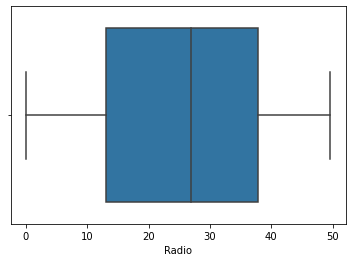

In [123]:
sns.boxplot(x=dd1['Radio'])

<AxesSubplot:xlabel='Sales'>

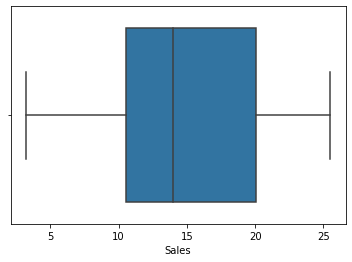

In [124]:
sns.boxplot(x=dd2)

In [125]:
y_pred = regressor.predict(x_test)
r2_score(y_test,y_pred)


0.9131201268569812